In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

#path = '/kaggle'
path = '/tmp/working'
input_path = path + '/input/gearbox-fault-diagnosis-stdev-of-accelerations/'
broken_dataset  = "b30hz_stdev_100.csv"
healthy_dataset = "h30hz_stdev_100.csv"


# Exploring the dataset

In [46]:
healthyDataset = pd.read_csv(input_path + healthy_dataset)
healthyDataset.describe()

,a1,a2,a3,a4,load,failure
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.0
mean,7.064944,4.238840,3.987288,4.343511,45.809533,0.0
std,2.231626,1.326401,1.069945,1.247653,28.315587,0.0
min,1.802930,1.272738,1.022471,1.222780,0.000000,0.0
25%,5.496722,3.337468,3.226538,3.453185,20.000000,0.0
50%,6.856787,4.016475,3.916282,4.275365,50.000000,0.0
75%,8.419728,4.846186,4.689546,5.156541,70.000000,0.0
max,23.909199,10.984053,8.273939,10.609798,90.000000,0.0


In [47]:
brokenDataset = pd.read_csv(input_path + broken_dataset)
brokenDataset.describe()

,a1,a2,a3,a4,load,failure
count,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.0
mean,4.455177,4.294107,3.706363,4.209203,45.478157,1.0
std,1.202618,0.969298,0.947515,1.205743,29.005078,0.0
min,1.468928,1.341292,0.990336,1.111679,0.000000,1.0
25%,3.595718,3.617281,3.020892,3.358830,20.000000,1.0
50%,4.399122,4.256609,3.646947,4.142668,50.000000,1.0
75%,5.221865,4.949478,4.354815,5.006999,70.000000,1.0
max,10.067158,8.071265,7.425122,10.022236,90.000000,1.0


## Join healthy & broken datasets in a single dataframe

In [48]:
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)
dataset.describe()

,a1,a2,a3,a4,load,failure
count,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000
mean,5.766842,4.266330,3.847555,4.276706,45.644706,0.497401
std,2.219236,1.162870,1.020591,1.228792,28.660383,0.500006
min,1.468928,1.272738,0.990336,1.111679,0.000000,0.000000
25%,4.164285,3.473209,3.118392,3.409206,20.000000,0.000000
50%,5.337988,4.146414,3.779156,4.211713,50.000000,0.000000
75%,7.003621,4.903647,4.521386,5.078614,70.000000,1.000000
max,23.909199,10.984053,8.273939,10.609798,90.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

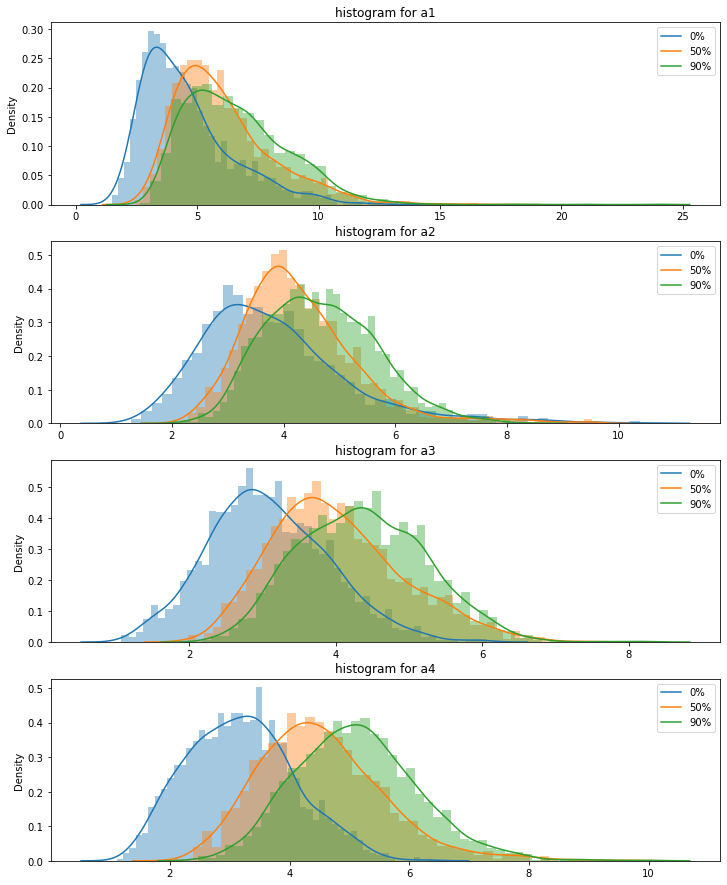

In [49]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

## Correlation matrix

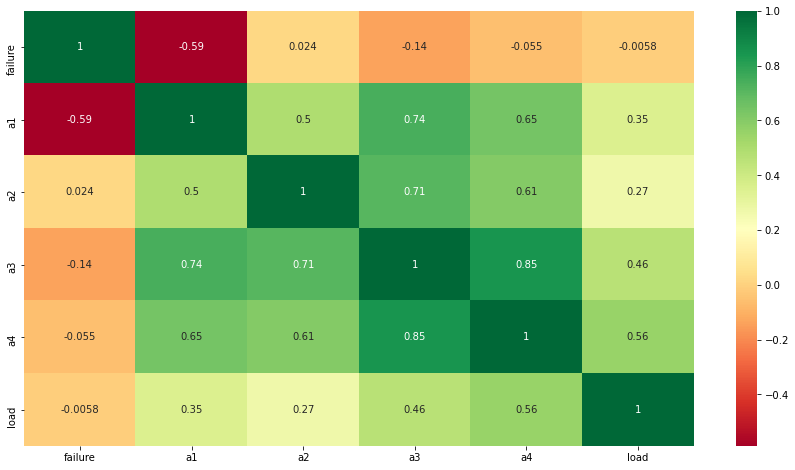

In [50]:
rcParams['figure.figsize'] = 15, 8
columns = ['failure','a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

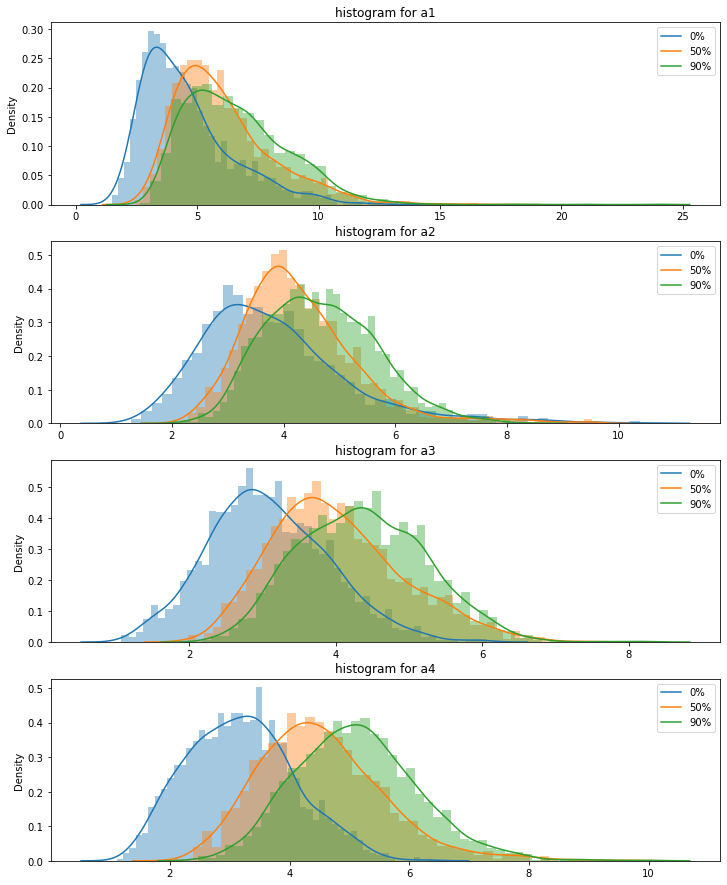

In [55]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

# Logistic regression

In [51]:
# Predictor variable (features)
# columns = ['a1', 'a2', 'a3', 'a4']
columns = ['a4']
X = healthyDataset[columns]
# Target variable: Load
y = healthyDataset[['load']]

In [52]:
# Split the dataset: 80% train, 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Logistic regression classifier
from sklearn.linear_model import LinearRegression

# Setup the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

print("Ordenada en el origen=", regressor.intercept_)
print("Pendiente de la recta para cada predictor (a1,a2,a3,a4) =", regressor.coef_)
print("Actual load for the test data (first 10 rows):", y_test[:10])

# Predict Failrure for the test set
y_pred = regressor.predict(X_test)
print("Prediction for the test data (first 10 rows):", y_pred[:10])

Ordenada en el origen= [-9.08507597]
Pendiente de la recta para cada predictor (a1,a2,a3,a4) = [[12.60978255]]
Actual load for the test data (first 10 rows):       load
4069  40.0
159    0.0
7183  70.0
8584  80.0
3318  30.0
5286  50.0
3852  30.0
6896  60.0
8435  80.0
7568  70.0
Prediction for the test data (first 10 rows): [[55.93773539]
 [42.20619068]
 [54.90212729]
 [56.39495375]
 [27.35486843]
 [42.94569302]
 [42.44947069]
 [62.65867702]
 [54.28810728]
 [70.64201411]]


## Evaluate the model

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[12.60978255]]
Mean squared error: 581.68
Coefficient of determination: 0.27


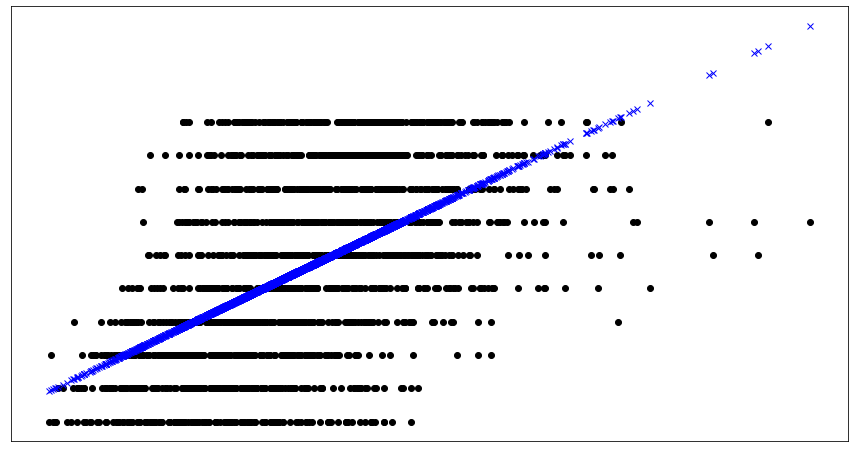

In [54]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test, 'o', color='black');
plt.plot(X_test, y_pred, 'x', color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()